In [1]:
import pandas as pd 
import geopandas 
import os 
import matplotlib.pyplot as plt
import numpy as np
import glob
import csv

In [2]:
df = pd.read_csv(r'D:/adamo/Documents/DataminingFiles/DataminingFiles/JC/JC-20161-citibike-tripdata.csv', quoting=csv.QUOTE_NONE,  sep=',', error_bad_lines=False)

path = r'D:/adamo/Documents/DataminingFiles/DataminingFiles/JC/' # use your path
all_files = glob.glob(path + "/JC-20*.csv")
headers = {0:'triptime',1:'start',2:'end',3:'stationid',4:'station1',5:'lat1',6:'long1',7:'endid',8:'endname',9:'lan2',10:'long2',11:'bikeid',12:'usertype',13:'birthyear',14:'gender'}
li = []

for filename in all_files:
    df = pd.read_csv(filename,  header=None  ,   index_col=None,
    encoding=None)
    df = df.iloc[1:]
    df = df.rename(columns=headers)
    li.append(df)
    

frame = pd.concat(li, axis=0, ignore_index=True)

data = pd.DataFrame(frame,columns=['start','station1','bikeid'])

print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/adamo/Documents/DataminingFiles/DataminingFiles/JC/JC-20161-citibike-tripdata.csv'

In [2]:
frame = pd.read_csv(r'D:/Projects/CSVDataming/JC2015-2020.csv')
data = pd.DataFrame(frame,columns=['start','station1','bikeid'])
print(data)

                            start          station1  bikeid
0             2015-09-21 14:53:16         City Hall   24722
1             2015-09-21 14:55:59    Exchange Place   24388
2             2015-09-21 14:56:14    Exchange Place   24442
3             2015-09-21 14:58:35     Hamilton Park   24678
4             2015-09-21 14:59:55     Hamilton Park   24574
...                           ...               ...     ...
1658062  2020-10-31 23:32:22.8650  Heights Elevator   17231
1658063  2020-10-31 23:33:22.7310         City Hall   46532
1658064  2020-10-31 23:37:01.7010  Monmouth and 6th   42230
1658065  2020-10-31 23:37:46.1430  Monmouth and 6th   45341
1658066  2020-10-31 23:40:06.3530           York St   45647

[1658067 rows x 3 columns]


In [3]:
everydata = pd.DataFrame(frame)
#everydata.to_csv('JC2015-2020.csv',index=False) save aone file with all JCs from 2015-2020
print(everydata) 

         triptime                     start                       end  \
0              61       2015-09-21 14:53:16       2015-09-21 14:54:17   
1             290       2015-09-21 14:55:59       2015-09-21 15:00:50   
2             786       2015-09-21 14:56:14       2015-09-21 15:09:21   
3             477       2015-09-21 14:58:35       2015-09-21 15:06:32   
4             451       2015-09-21 14:59:55       2015-09-21 15:07:27   
...           ...                       ...                       ...   
1658062      1054  2020-10-31 23:32:22.8650  2020-10-31 23:49:57.5320   
1658063       156  2020-10-31 23:33:22.7310  2020-10-31 23:35:59.4930   
1658064      1858  2020-10-31 23:37:01.7010  2020-11-01 00:07:59.7530   
1658065      1809  2020-10-31 23:37:46.1430  2020-11-01 00:07:55.2740   
1658066       395  2020-10-31 23:40:06.3530  2020-10-31 23:46:42.0640   

         stationid          station1       lat1      long1  endid  \
0             3185         City Hall  40.717733 -74.04

In [5]:
# list of states 
stationnamesframe =   everydata.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station1','lat1','long1'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
print(stationnamesframe) # 63 stations in JC
stationnames =  pd.DataFrame(stationnamesframe , columns=['station1'])['station1'].to_numpy().tolist()
print(stationnames)
#stationnamesframe.to_csv("stations.csv",index=False ) save file with all stations 

                           station1       lat1      long1
0                         City Hall  40.717733 -74.043845
1                    Exchange Place  40.716247 -74.033459
3                     Hamilton Park  40.727596 -74.044247
5                           Sip Ave  40.730743 -74.063784
12                  Christ Hospital  40.734786 -74.050444
...                             ...        ...        ...
663806                     Grand St  40.715178 -74.037683
781528               Jackson Square  40.711130 -74.078900
994382                      Sip Ave  40.730897 -74.063913
1079005  Hoboken Ave at Monmouth St  40.735208 -74.046964
1134359  Columbus Dr at Exchange Pl  40.716870 -74.032810

[64 rows x 3 columns]
['City Hall', 'Exchange Place', 'Hamilton Park', 'Sip Ave', 'Christ Hospital', 'Baldwin at Montgomery', 'Warren St', 'Newport PATH', 'Newark Ave', 'Brunswick St', 'Newport Pkwy', 'Bayside Park', 'Grove St PATH', 'Riverview Park', 'Essex Light Rail', 'Paulus Hook', 'Columbia Park',

In [32]:
#linker


linker = pd.DataFrame(everydata,columns=['start','station1','endname'])
linker['start'] = pd.to_datetime(linker['start'], errors='coerce')
linker = linker.groupby([ linker['start'].dt.year  ,'station1','endname']).count()
linker.index = linker.index.set_names([ 'year','st1','st2'])
linker = linker.reset_index()

linker = pd.DataFrame(linker , columns=['year','st1','st2'] )
linker = linker[linker['year'] == 2019]
linker.to_csv('linker.csv')

In [5]:
data['start'] = pd.to_datetime(data['start'], errors='coerce')

In [12]:
#group count by city
li2 = []
for station in stationnames:
    filter2= data["station1"]==station
    statefilter = pd.DataFrame(data.where(filter2),columns=['start' ,'bikeid']).dropna()
    li2.append(statefilter)

In [27]:
# join all tables
print(len(stationnames))
alldata = li2[0]
alldata = alldata.groupby([ alldata['start'].dt.year ,  alldata['start'].dt.isocalendar().week ])['bikeid'].agg(['count'])
alldata.columns = [stationnames[0]]
alldata.index = alldata.index.set_names([ 'year','week'])
for i in range(1,len(stationnames)):
    d1 = li2[i]
    d1 = d1.groupby([ d1['start'].dt.year,d1['start'].dt.isocalendar().week])['bikeid'].agg(['count'])
    d1.columns = [stationnames[i]]
    d1.index = d1.index.set_names([ 'year','week'])
    alldata = pd.merge(alldata,d1,on=['year','week'],how='outer')

64


In [33]:
alldata = alldata.sort_values(by=['year','week']).fillna(0)
alldata.to_csv('citycountbyweekyear.csv')

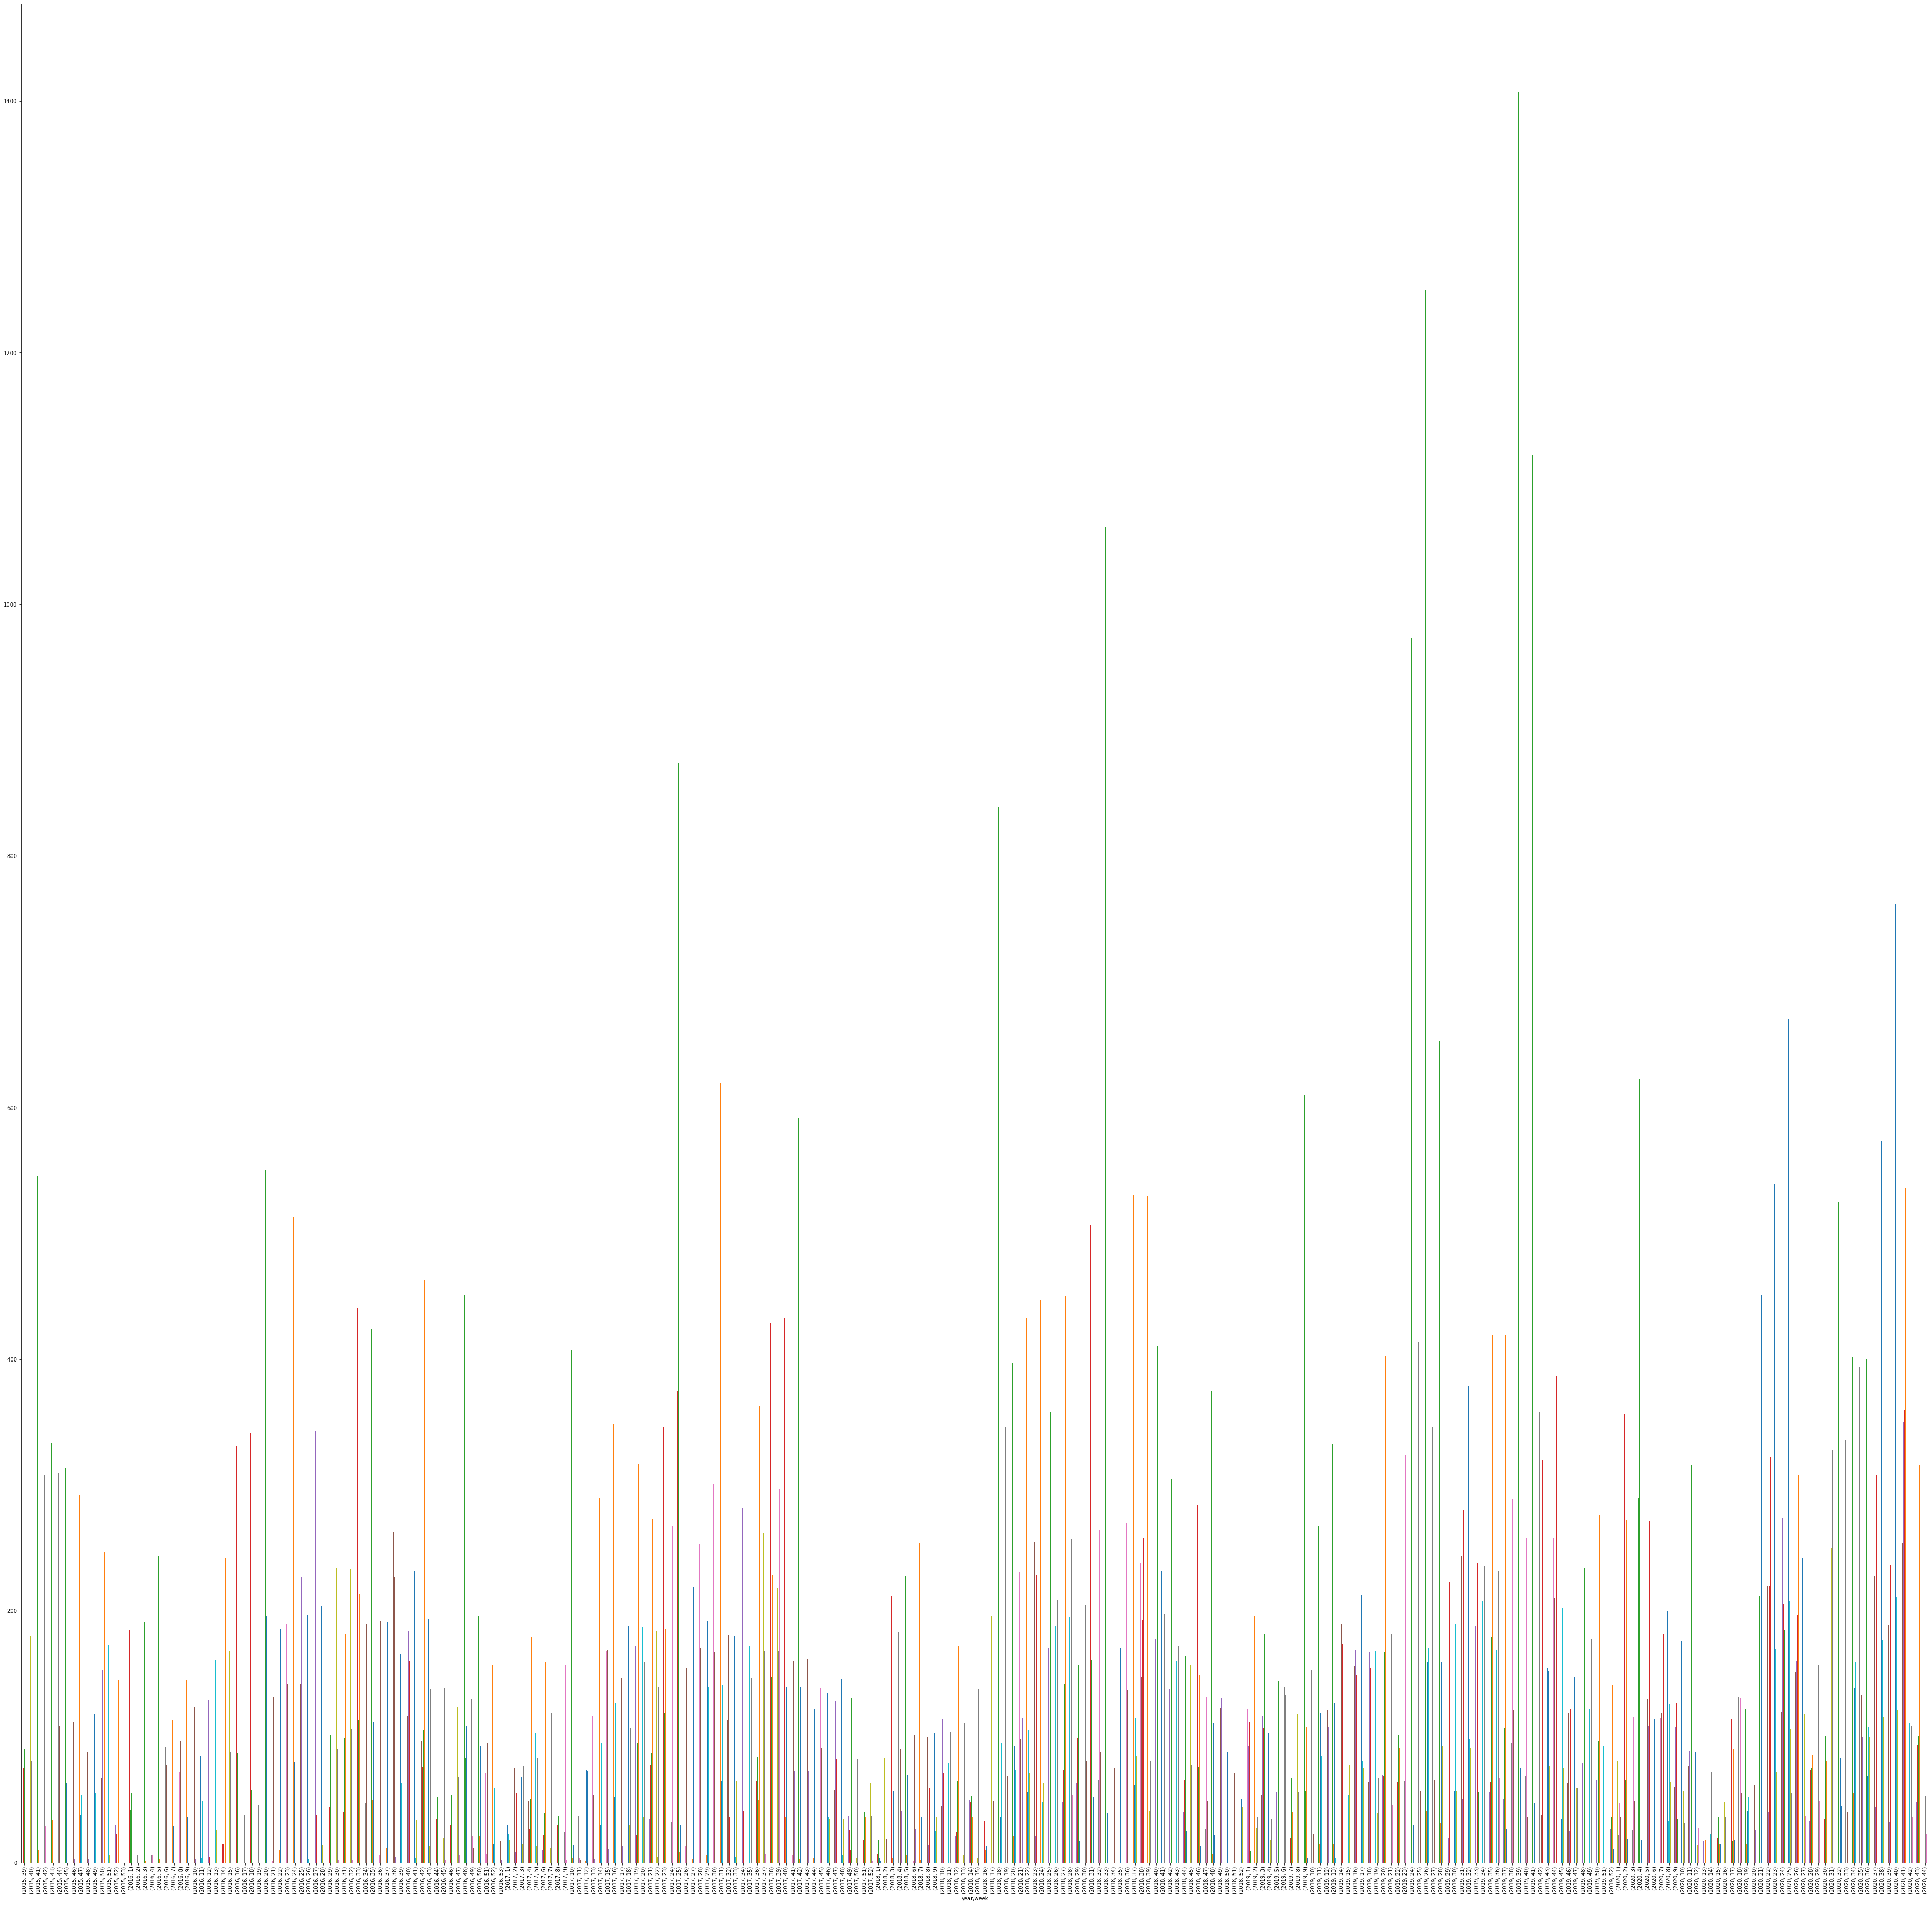

In [32]:
#visualize all data 
alldata.plot(kind='bar',legend=False)
figure = plt.gcf() 
figure.set_size_inches(65, 65)
plt.savefig('alldata.png',dpi=100)

In [181]:
stations = alldata.groupby([alldata['start'].dt.date]).agg({'bikeid': ['count']})

In [182]:
print (stations)

           bikeid
            count
start            
2020-01-01     47
2020-01-02     81
2020-01-03    101
2020-01-04     51
2020-01-05     70
...           ...
2020-10-27     78
2020-10-28     76
2020-10-29     31
2020-10-30     40
2020-10-31      8

[305 rows x 1 columns]


In [192]:
yearweekcount = grovefilter.groupby([   grovefilter['start'].dt.year ,grovefilter['start'].dt.isocalendar().week ])['bikeid'].agg(['count'])
yearweekcount.columns = ['Grove St PATH']
yearcount = grovefilter.groupby([   grovefilter['start'].dt.year ])['bikeid'].agg(['count'])
monthcount = grovefilter.groupby([   grovefilter['start'].dt.year ,grovefilter['start'].dt.month ])['bikeid'].agg(['count'])

yearcount.columns = ['Grove St PATH']

63


In [223]:
yearweekcount.index = yearweekcount.index.set_names([  'Year', 'Week'])
alldata = alldata.fillna(0)
print(alldata )

      City Hall  Exchange Place  Hamilton Park  Sip Ave  Christ Hospital  \
Year                                                                       
2015       1978          4109.0           4116     3398              861   
2016       7791         19014.0          15300    17137             2366   
2017       8422         19393.0          19810    15598             2393   
2018       8829         18970.0          20867    18184             2420   
2019      10186          5304.0          24106    19085             2432   
2020       8700             0.0          13415    12174             1477   

      Baldwin at Montgomery  Warren St  Newport PATH  Newark Ave  \
Year                                                               
2015                    917       2236          3468        2551   
2016                   4529       8344         13363        9168   
2017                   3686       9206         12516        9031   
2018                   4069       9258         1524

In [169]:
yearweekcount.head()

Grove St PATH
Year Week               
2015 39              472
     40              410
     41              546
     42              562
     43              539

In [173]:
yearcount.index = yearcount.index.set_names(['Year'])
print(yearcount)

      Grove St PATH
Year               
2015           5989
2016          28736
2017          35856
2018          40931
2019          46662
2020          20572


<AxesSubplot:xlabel='Year,Week'>

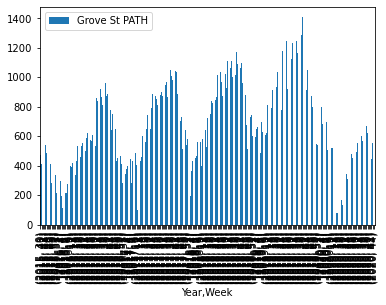

In [165]:
yearweekcount.plot(kind='bar')

<AxesSubplot:xlabel='Year'>

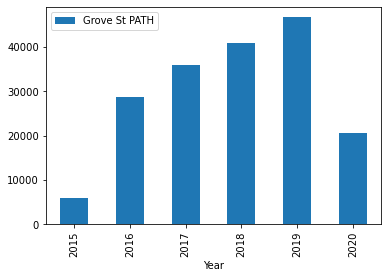

In [174]:
yearcount.plot(kind='bar')

<AxesSubplot:xlabel='start,start'>

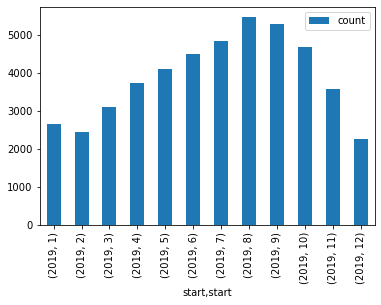

In [190]:
monthcount.plot(kind='bar')

<AxesSubplot:xlabel='start,start'>

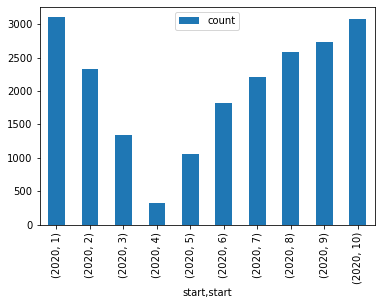

In [193]:
monthcount.plot(kind='bar')

<AxesSubplot:xlabel='Year'>

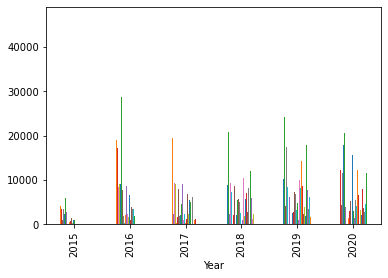

In [226]:
alldata.plot(kind='bar' , legend=False)

In [227]:
alldata.to_csv('year.csv')

In [264]:
yeartrans =  alldata.T

In [265]:
yeartrans.to_csv('yeartranspose.csv')

In [292]:
y = pd.DataFrame(yeartrans)
y.head()
test = pd.DataFrame( stationnamesframe)
y15= pd.DataFrame(y.iloc[:, 0])
y15.index = y15.index.set_names([  'station1' ])
y16= pd.DataFrame(y.iloc[:, 1])
y16.index = y16.index.set_names([  'station1' ])
y17= pd.DataFrame(y.iloc[:, 2])
y17.index = y17.index.set_names([  'station1' ])
y18= pd.DataFrame(y.iloc[:, 3])
y18.index = y18.index.set_names([  'station1' ])
y19= pd.DataFrame(y.iloc[:, 4])
y19.index = y19.index.set_names([  'station1' ])
y20= pd.DataFrame(y.iloc[:, 5])
y20.index = y20.index.set_names([  'station1' ])
test=pd.merge(test,y15,on='station1',how='outer')
test=pd.merge(test,y16,on='station1',how='outer')
test=pd.merge(test,y17,on='station1',how='outer')
test=pd.merge(test,y18,on='station1',how='outer')
test=pd.merge(test,y19,on='station1',how='outer')
test=pd.merge(test,y20,on='station1',how='outer')
print(test)

                      station1                lat1               long1  \
0                    City Hall          40.7177325          -74.043845   
1               Exchange Place          40.7162469         -74.0334588   
2                Hamilton Park        40.727595966       -74.044247311   
3                      Sip Ave   40.73074262530658  -74.06378388404846   
4                      Sip Ave   40.73089709786179  -74.06391263008118   
..                         ...                 ...                 ...   
59                  Bergen Ave  40.722103786686034  -74.07145500183105   
60                    Grand St   40.71517767732029  -74.03768330812454   
61              Jackson Square            40.71113            -74.0789   
62  Hoboken Ave at Monmouth St   40.73520838045357  -74.04696375131607   
63  Columbus Dr at Exchange Pl            40.71687           -74.03281   

      2015     2016     2017     2018     2019     2020  
0   1978.0   7791.0   8422.0   8829.0  10186.0   8700

In [289]:
test.to_csv('geoyear.csv',index=False )

In [293]:
lowerdf = pd.read_csv(r'JC2015-2020.csv')

In [302]:
newdf = pd.DataFrame(lowerdf,columns=['stationid','long1','lat1' , 'station1'])
newdf = newdf.drop_duplicates() 
print(newdf)

         stationid      long1       lat1                    station1
0             3185 -74.043845  40.717733                   City Hall
1             3183 -74.033459  40.716247              Exchange Place
3             3203 -74.044247  40.727596               Hamilton Park
5             3195 -74.063784  40.730743                     Sip Ave
12            3212 -74.050444  40.734786             Christ Hospital
...            ...        ...        ...                         ...
663806        3681 -74.037683  40.715178                    Grand St
781528        3694 -74.078900  40.711130              Jackson Square
994382        3195 -74.063913  40.730897                     Sip Ave
1079005       3791 -74.046964  40.735208  Hoboken Ave at Monmouth St
1134359       3792 -74.032810  40.716870  Columbus Dr at Exchange Pl

[64 rows x 4 columns]


In [303]:
newdf.to_csv('newdf.csv',index=False)

In [304]:
startend = pd.DataFrame(lowerdf,columns=['stationid','endid'])
print(startend)

         stationid  endid
0             3185   3185
1             3183   3187
2             3183   3183
3             3203   3203
4             3203   3186
...            ...    ...
1658062       3198   3678
1658063       3185   3681
1658064       3278   3278
1658065       3278   3278
1658066       3481   3273

[1658067 rows x 2 columns]


In [305]:
startend.to_csv('startend.csv',index=False)

In [50]:
d = dict(enumerate(stationnames, 1))
print(d)
kilearn = pd.DataFrame( data )
kilearn = kilearn.groupby([ kilearn['start'].dt.year,kilearn['start'].dt.isocalendar().week,kilearn['station1']])['bikeid'].agg(['count'])
kilearn.columns = ['anzahl']
kilearn.index = kilearn.index.set_names([ 'year','week','station'])
kilearn.to_csv('weekcount.csv')
#test = pd.get_dummies(kilearn,prefix=['station'])
print(kilearn)

{1: 'City Hall', 2: 'Exchange Place', 3: 'Hamilton Park', 4: 'Sip Ave', 5: 'Christ Hospital', 6: 'Baldwin at Montgomery', 7: 'Warren St', 8: 'Newport PATH', 9: 'Newark Ave', 10: 'Brunswick St', 11: 'Newport Pkwy', 12: 'Bayside Park', 13: 'Grove St PATH', 14: 'Riverview Park', 15: 'Essex Light Rail', 16: 'Paulus Hook', 17: 'Columbia Park', 18: 'Heights Elevator', 19: 'NJCU', 20: 'MLK Light Rail', 21: '5 Corners Library', 22: 'Dey St', 23: 'Oakland Ave', 24: 'Hilltop', 25: 'Van Vorst Park', 26: 'McGinley Square', 27: 'Central Ave', 28: 'JC Medical Center', 29: 'North St', 30: 'Lincoln Park', 31: 'Liberty Light Rail', 32: 'West Side Light Rail', 33: 'Pershing Field', 34: 'Garfield Ave Station', 35: 'Union St', 36: 'Jersey & 6th St', 37: 'Morris Canal', 38: 'Jersey & 3rd', 39: 'Lafayette Park', 40: 'Monmouth and 6th', 41: 'Dixon Mills', 42: 'Marin Light Rail', 43: 'Manila & 1st', 44: 'Columbus Drive', 45: 'Bethune Center', 46: 'Leonard Gordon Park', 47: 'Danforth Light Rail', 48: 'Brunswic